#### Isobaric nitrogen

* This notebook sets up the isobaric evaporation of liquid nitrogen in a Linde 80m^3 tank to compare evaporation rates with the same case but with the tank closed
* Coolprop will be called to retrieve the cryogen thermophysical properties. Hence, the cryogen will be specificied in the notebook

## Desired input and output
* Tank characteristics: .CSV file with tank geometrical properties
* Cryogen: .CSV file with the cryogen ID consistent with coolprop
* Popular cryogens: hydrogen, methane, nitrogen, oxygen.


In [1]:
# Ensure that python finds the submodules
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

## Module imports
# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen
# from cryoevap.cryogens import Cryogen

#### Use example

Analyse BOG rates of liquid hydrogen in a retrofitted LNG storage tank,and compare it to methane BOG rates

In [2]:
# Retrofitted LNG tank properties
Q_roof = 0 # Roof heat ingress / W
d_i = 2.706 # Internal diameter / m
d_o = 3   # External diameter / m
T_air = 293.15 # Temperature of the environment K


eta_w = 0.97
# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 7.237e-3 # W/m2/K
U_V = 7.237e-3 * (1-eta_w) # W/m2/K

# Specify heat transfer rate at the bottom to prevent ground heating
Q_b = 0 # W, no heat ingress from the tank bottom 

# Vertically orientated cylindrical tank volume
V_tank = 80.36 #m^3

# Initial liquid filling / Dimensionless
LF = 0.95 

# Specify tank operating pressure
P = 101325 # Pa

# Initialize tank
large_tank = Tank(d_i, d_o, V_tank, LF)
large_tank.set_HeatTransProps(U_L, U_V, T_air, Q_roof, Q_b)

In [3]:
nitrogen = Cryogen(name = "nitrogen")
nitrogen.set_coolprops("nitrogen", P)
large_tank.cryogen = nitrogen
print("The evaporation rate of " + nitrogen.name + " is %.1f kg/h" % (large_tank.b_l_dot * 3600))

print("Equivalent to %.1f g/s" % (large_tank.b_l_dot * 1000))

The evaporation rate of nitrogen is 3.5 kg/h
Equivalent to 1.0 g/s


In [4]:
# J / kg K
nitrogen.cp_L

# J / mol K
cpL_molar = nitrogen.cp_L * nitrogen.MW

print(cpL_molar)

57.18932191721181


In [5]:
dH_LV_molar = (nitrogen.h_V - nitrogen.h_L) * nitrogen.MW
print("dH_LV_molar = %.3f J/mol" % dH_LV_molar)


dH_LV_molar = 5579.614 J/mol


Liquid nitrogen properties for Linde tank calculations

#### Simulate liquid nitrogen evaporation 

In [6]:
# large_tank.evaporate(3600*24*7*52)
large_tank.z_grid = np.linspace(0, large_tank.l * (1-large_tank.LF), 40)
# large_tank.U_roof = 0
large_tank.evaporate(3600*24)

Plot vapour temperature profile

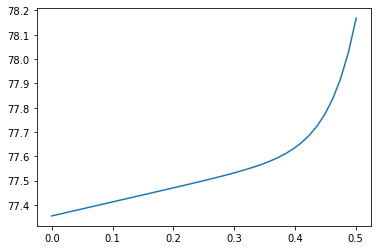

In [ ]:
z = (large_tank.l * (1-large_tank.LF))* large_tank.z_grid
T_end = large_tank.sol.y[1:, -1]
plt.plot(z, T_end)

Text(0, 0.5, '$ V_L / m^3$')

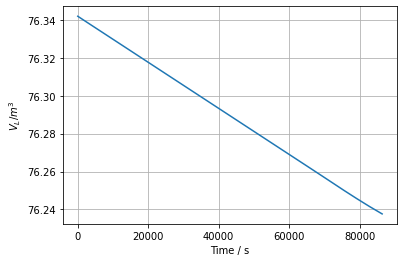

In [ ]:
# Access to the liquid volume
V_L = large_tank.sol.y[0]
plt.plot(large_tank.sol.t, V_L)
plt.grid()
plt.xlabel('Time / s')
plt.ylabel('$ V_L / m^3$')

In [ ]:
nitrogen.T_sat

77.35499390959467

In [ ]:
# Calculate evaporated mass
BOG_total = nitrogen.rho_L * (V_L[0] - V_L[-1])
print("BOG = %.3f kg" % BOG_total)

BOG = 84.150 kg


In [ ]:
BOG_total  / nitrogen.MW

3003.8994984747233

Text(0, 0.5, '$ B_L / kg/h$')

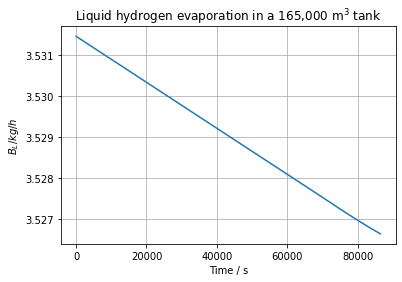

In [ ]:
# Extract evaporation rate and convert to kg/h
B_L = large_tank.evap_rate() * 3600

# Visualise evaporation rate
plt.plot(large_tank.sol.t, B_L) 
plt.grid()
plt.title("Liquid hydrogen evaporation in a 165,000 m$^3$ tank")
plt.xlabel('Time / s')
plt.ylabel('$ B_L / kg/h$')